In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

Text(0.5, 0, '$t(\\omega_{pe}^{-1})$')

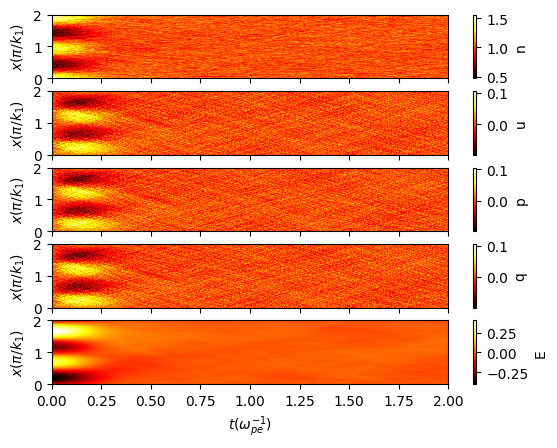

In [20]:
k1 = 0.6
k2 = 1.2
A1 = 0.05
A2 = 0.4
phi = 0.38716
L = 2*np.pi/k1

tf = 2
dt = 0.001
nx = 256

t = np.arange(0,tf,dt)
x = np.linspace(0,2,nx,endpoint=False)
X,T = np.meshgrid(x,t)
field_labels = ["n", "u", "p", "q", "E"]
field = [np.zeros_like(X) for i in range(len(field_labels))]

files = sorted(os.listdir("data_pic"))
for frame, file in enumerate(files[:t.size]):
    data = np.load("data_pic/"+file)
    for n in range(len(field)):
        field[n][frame,:] = data[field_labels[n]]

fig, ax = plt.subplots(len(field_labels),1,sharex=True)
for n in range(len(field)):
    pcm = ax[n].pcolormesh(T,X,field[n],cmap="hot")
    # ax[n].colorbar(label=field_labels[n])
    ax[n].set_ylabel("$x(\pi/k_1)$")
    ax[n].set_xlim([0,tf])
    ax[n].set_ylim([0,L/(np.pi/k1)])
    fig.colorbar(pcm, ax=ax[n], label=field_labels[n])
ax[n].set_xlabel("$t(\omega_{pe}^{-1})$")


Text(0, 0.5, '$|E|^2$')

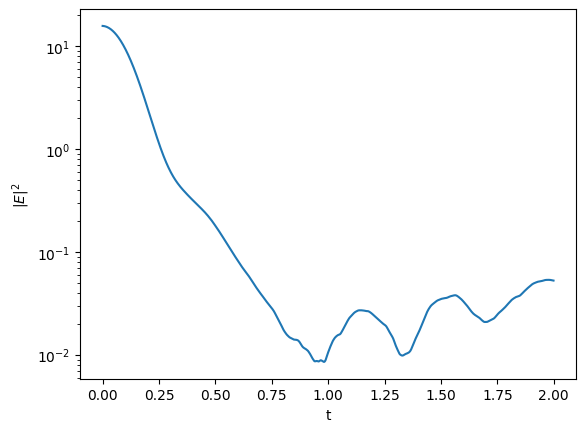

In [21]:
E = field[-1]
E_sqr = np.sum(E**2,axis=1)
plt.semilogy(t,E_sqr)
plt.xlabel("t")
plt.ylabel("$|E|^2$")